# Chapter6 Classification

###### 6.1 Implementing a Classifier

Now that we've discussed the various classifiers that Scikit-Learn provides access to, let's see how to implement a classifier.

* The first step in implementing a classifier is to import the classifier you need into Python. Let's look at the import statement for logistic regression:

In [1]:
from sklearn.linear_model import LogisticRegression

* Here are the import statements for the other classifiers discussed in this lecture. (Scikit-Learn has other classifiers as well, and their respective documentation pages will show how to import them.)

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

* After this, the classifier must be instantiated. Instantiation is the process of bringing the classifier into existence within your Python program - to create an instance of the classifier/object.

* This is typically done just by making a variable and calling the function associated with the classifier:

logreg_clf = LogisticRegression()

* Now the classifier needs to be trained. In order to accomplish this, the classifier must be fit with the training data.

* The training features and the training labels are passed into the classifier with the fit command:

logreg_clf.fit(features, labels)

* After the classifier model has been trained on the training data, it can make predictions on the testing data.

* This is easily done by calling the **predict** command on the classifier and providing it with the parameters it needs to make predictions about, which are the features in your testing dataset:

logreg_clf.predict(test_features)

* These steps: instantiation, fitting/training, and predicting are the basic workflow for classifiers in Scikit-Learn.

* However, the handling of classifiers is only one part of doing classifying with Scikit-Learn. The other half of the classification in Scikit-Learn is handling data.

* To understand how handling the classifier and handling data come together as a whole classification task, let's take a moment to understand the machine learning pipeline.

## 6.2 The Machine Learning Pipeline
The machine learning pipeline has the following steps: preparing data, creating training/testing sets, instantiating the classifier, training the classifier, making predictions, evaluating performance, tweaking parameters.

* The first step to training a classifier on a dataset is to prepare the dataset - to get the data into the correct form for the classifier and handle any anomalies in the data. If there are missing values in the data, outliers in the data, or any other anomalies these data points should be handled, as they can negatively impact the performance of the classifier. This step is referred to as data preprocessing.



* Once the data has been preprocessed, the data must be split into training and testing sets. We have previously discussed the rationale for creating training and testing sets, and this can easily be done in Scikit-Learn with a helpful function called **train_test_split**.



* As previously discussed the classifier has to be instantiated and trained on the training data. After this, predictions can be made with the classifier. By comparing the predictions made by the classifier to the actual known values of the labels in your test data, you can get a measurement of how accurate the classifier is.



* There are various methods comparing the hypothetical labels to the actual labels and evaluating the classifier. We'll go over these different evaluation metrics later. For now, know that after you've measured the classifier's accuracy, you will probably go back and tweak the parameters of your model until you have hit an accuracy you are satisfied with (as it is unlikely your classifier will meet your expectations on the first run).

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score

## 6.3 Sample Classification Implementation

In [4]:
# Begin by importing all necessary libraries
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

* Just put the data file in the same directory as your Python file. The Pandas library has an easy way to load in data, **read_csv()**

In [5]:
data = pd.read_csv('examples/iris.csv',index_col=0)
    
# It is a good idea to check and make sure the data is loaded as expected.

data.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
59,6.6,2.9,4.6,1.3,Iris-versicolor
43,4.4,3.2,1.3,0.2,Iris-setosa
105,6.5,3.0,5.8,2.2,Iris-virginica
56,5.7,2.8,4.5,1.3,Iris-versicolor
34,5.5,4.2,1.4,0.2,Iris-setosa


* Because the dataset has been prepared so well, we don't need to do a lot of preprocessing.

In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

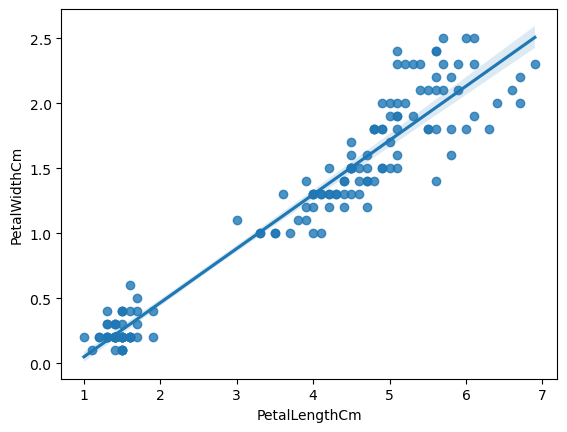

In [7]:
import seaborn as sns
%matplotlib inline
sns.regplot(x='PetalLengthCm',y='PetalWidthCm',data=data)

* We now need to define the features and labels. We can do this easily with Pandas by slicing the data table and choosing certain rows/columns with **iloc()**:

In [8]:
# Pandas ".iloc" expects row_indexer, column_indexer  
X = data.iloc[:,:-1]
# Now let's tell the dataframe which column we want for the target/labels. 
# The slicing notation above selects every row and every column except the last column (which is our label, the species).
y = data['Species']

* Now that we have the features and labels we want, we can split the data into training and testing sets using sklearn's handy feature **train_test_split()**

In [9]:
from sklearn.model_selection import train_test_split
# Test size specifies how much of the data you want to set aside for the testing set. 
# Random_state parameter is just a random seed we can use. You can use it if you'd like to reproduce these specific results.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

Now we can instantiate the models.

### 6.3.1 Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()

* Now let's fit the classifiers:

In [11]:
LR_model.fit(X_train, y_train)

d:\Users\fan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

* The call has trained the model, so now we can predict and store the prediction in a variable

In [12]:
LR_prediction = LR_model.predict(X_test)

* We should now evaluate how the classifier performed. There are multiple methods of evaluating a classifier's performance, and you can read more about there different methods below.

* In Scikit-Learn you just pass in the predictions against the ground truth labels which were stored in your test labels:

In [13]:
# Accuracy score is the simplest way to evaluate
from sklearn.metrics import accuracy_score
print(accuracy_score(LR_prediction, y_test))

0.9333333333333333


In [14]:
# But Confusion Matrix and Classification Report give more details about performance
from sklearn.metrics import confusion_matrix
print(confusion_matrix(LR_prediction, y_test))

[[ 7  0  0]
 [ 0 10  1]
 [ 0  1 11]]


* This can be a bit hard to interpret, but the number of correct predictions for each class run on the diagonal from top-left to bottom-right. Check below for more info on this

In [15]:
# Build a text report showing the main classification metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, LR_prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



* The reported averages include macro average (averaging the unweighted mean per label), weighted average (averaging the support-weighted mean per label), and sample average (only for multilabel classification). Micro average (averaging the total true positives, false negatives and false positives) is only shown for multi-label or multi-class with a subset of classes, because it corresponds to accuracy otherwise and would be the same for all metrics

In [16]:
# cross-validation scores:
from sklearn.model_selection import cross_val_score
LR_model.fit(X, y)
cv_scores = cross_val_score(LR_model, X, y, cv=5)
print(cv_scores)

d:\Users\fan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.96666667 1.         0.93333333 0.96666667 1.        ]


d:\Users\fan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Users\fan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

### 6.3.2 Linear Discriminant  Analysis

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
LDA_prediction = LDA_model.predict(X_test)
print(accuracy_score(LDA_prediction, y_test))
print(confusion_matrix(LDA_prediction, y_test))
print(classification_report(y_test, LDA_prediction))

0.9666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



### 6.3.3 Gaussian Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)
GNB_prediction = GNB_model.predict(X_test)
print(accuracy_score(GNB_prediction, y_test))
print(confusion_matrix(GNB_prediction, y_test))
print(classification_report(y_test, GNB_prediction))

0.9
[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.91      0.87        11
 Iris-virginica       0.91      0.83      0.87        12

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



### 6.3.4 K-Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)
print(accuracy_score(KNN_prediction, y_test))
print(confusion_matrix(KNN_prediction, y_test))
print(classification_report(y_test, KNN_prediction))

0.9666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



### 6.3.5 Decision Trees

In [20]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
DT_prediction = DT_model.predict(X_test)
print(accuracy_score(DT_prediction, y_test))
print(confusion_matrix(DT_prediction, y_test))
print(classification_report(y_test, DT_prediction))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  3]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.77      0.91      0.83        11
 Iris-virginica       0.90      0.75      0.82        12

       accuracy                           0.87        30
      macro avg       0.89      0.89      0.88        30
   weighted avg       0.88      0.87      0.87        30



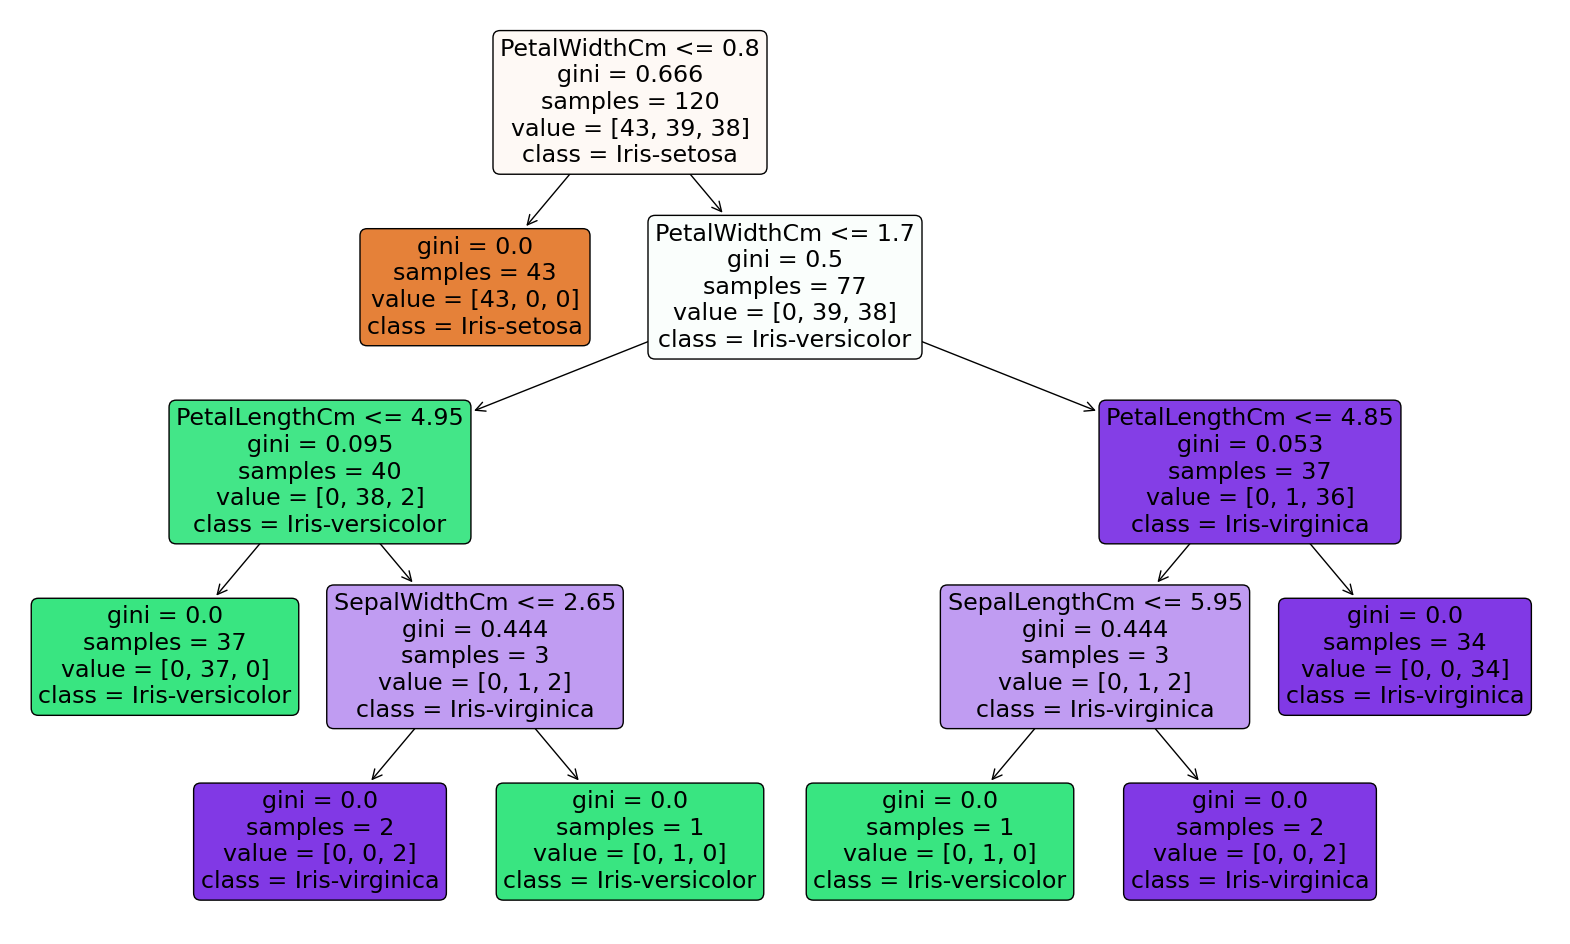

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

feature_names = data.columns[:5]
target_names = data['Species'].unique().tolist()

plt.figure(figsize=(20,12)) 
plot_tree(DT_model, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)
 
plt.savefig('examples/tree_visualization.png')

### 6.3.6 Support Vector Machines

In [22]:
from sklearn.svm import SVC
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)
print(accuracy_score(SVC_prediction, y_test))
print(confusion_matrix(SVC_prediction, y_test))
print(classification_report(y_test, SVC_prediction))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  1]
 [ 0  1 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



### 6.3.7 Evaluating the Classifier

In [23]:
print('Logistic Regression: %f' %accuracy_score(LR_prediction, y_test))
print('Linear Discriminant Analysis: %f' %accuracy_score(LDA_prediction, y_test))
print('Gaussian Naive Bayes: %f' %accuracy_score(GNB_prediction, y_test))
print('K-Nearest Neighbors: %f' %accuracy_score(KNN_prediction, y_test))
print('Decision Trees: %f' %accuracy_score(DT_prediction, y_test))
print('Support Vector Machines: %f' %accuracy_score(SVC_prediction, y_test))

Logistic Regression: 0.933333
Linear Discriminant Analysis: 0.966667
Gaussian Naive Bayes: 0.900000
K-Nearest Neighbors: 0.966667
Decision Trees: 0.866667
Support Vector Machines: 0.933333


In [24]:
LR_model.fit(X,y)
LDA_model.fit(X,y)
GNB_model.fit(X,y)
KNN_model.fit(X,y)
DT_model.fit(X,y)
SVC_model.fit(X,y)
print('Logistic Regression:',cross_val_score(LR_model, X, y, cv=5))
print('Linear Discriminant Analysis: ' ,cross_val_score(LDA_model, X, y, cv=5))
print('Gaussian Naive Bayes: ' ,cross_val_score(GNB_model, X, y, cv=5))
print('K-Nearest Neighbors: ' ,cross_val_score(KNN_model, X, y, cv=5))
print('Decision Trees: ' ,cross_val_score(DT_model, X, y, cv=5))
print('Support Vector Machines: ' ,cross_val_score(SVC_model, X, y, cv=5))

d:\Users\fan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Users\fan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

Logistic Regression: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Linear Discriminant Analysis:  [1.         1.         0.96666667 0.93333333 1.        ]
Gaussian Naive Bayes:  [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
K-Nearest Neighbors:  [0.96666667 1.         0.93333333 0.96666667 1.        ]
Decision Trees:  [0.96666667 0.96666667 0.9        0.96666667 1.        ]
Support Vector Machines:  [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]


# 6.4 Example : The Stock Market Data

This data set consists of percentage returns for the S&P 500 stock index over 1250 days, from the beginning of 2001 until the end of 2005. For each date, we have recorded the percentage returns for each of the five previous trading days, Lag1 through Lag5. We have also recorded Volume (the number of shares traded on the previous day, in billions), Today (the percentage return on the date in question) and Direction (whether the market was Up or Down on this date).

In [25]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

## 6.4.1 The Stock Market Data

In [26]:
data = pd.read_csv('examples/Smarket.csv',index_col=0)
print(data.shape)
data.head()

(1250, 9)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [27]:
data.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [28]:
data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [29]:
#produces a correlation matrix for all the numrice columns 
corr = data.corr()
corr

C:\Users\fan\AppData\Local\Temp\ipykernel_13552\2817781679.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


<Axes: >

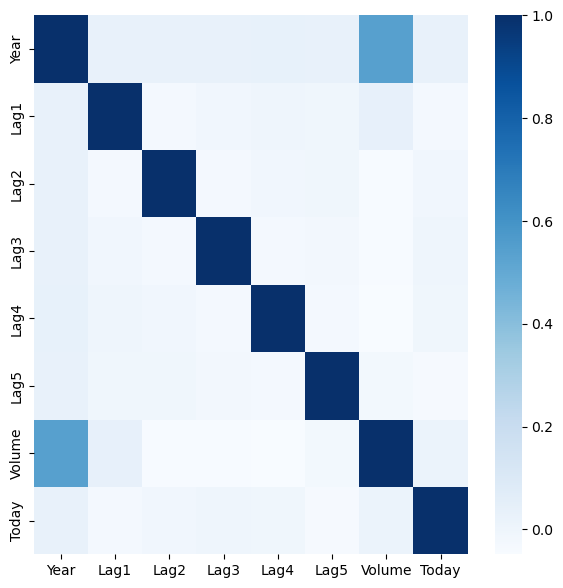

In [30]:
# the best way to visualize corerelations matrices is heatmap
plt.figure(figsize = (7,7))
sns.heatmap(corr,cmap="Blues")

* We can see from the above figure that correlations between veriables excpet Volume and Year are close to zero.
* The only substantial correlation is between Year and Volume. By plotting the data we see that Volume is increasing over time. In other words, the average number of shares traded daily increased from 2001 to 2005

<Axes: xlabel='Year', ylabel='Volume'>

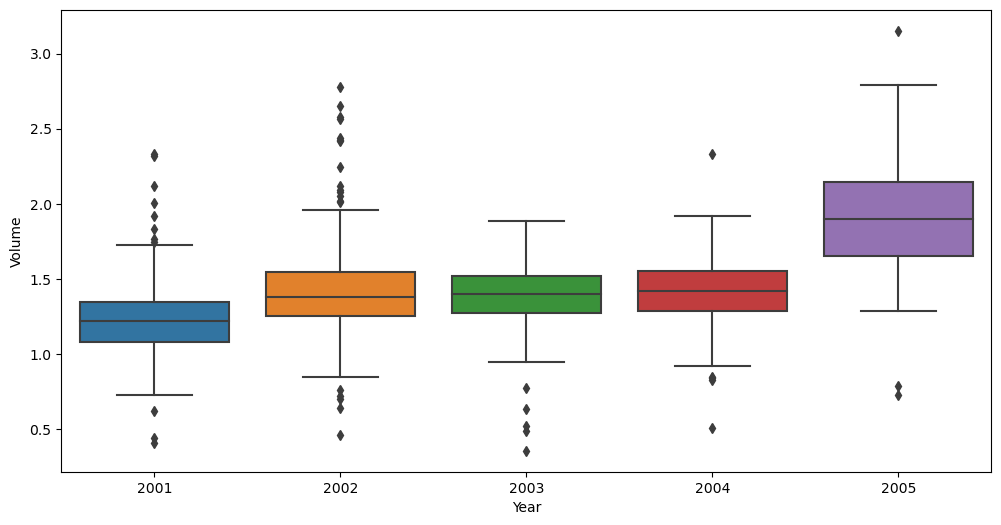

In [31]:
# we choose the x axis as year, chossing year will give a boxplot
plt.figure(figsize = (12,6))
sns.boxplot(x='Year',y='Volume',data=data)

## 6.4.2 Logistic Regression

we will fit a logistic regression model in order to predict Direction using Lag1 through Lag5 and Volume

In [32]:
#store a copy of the original data, as we are going to make some changes in the data
data_orig = data.copy()
data['Direction'] = data['Direction'].map({'Down':0,'Up':1})
data

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,1
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,1
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,0
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,1
5,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,1
...,...,...,...,...,...,...,...,...,...
1246,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,1
1247,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,0
1248,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,1
1249,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,0


In [33]:
logit = smf.logit('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume',data = data)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Sun, 26 May 2024   Pseudo R-squ.:                0.002074
Time:                        22:37:03   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.

The smallest p-value here is associated with Lag1. The negative coefficient for this predictor suggests that if the market had a positive return yesterday, then it is less likely to go up today. 

However, at a value of 0.15, the p-value is still relatively large, and so there is no clear evidence of a real association between Lag1 and Direction.

* The predict() function can be used to predict the probability that the market will go up, given values of the predictors. 
* In order to make a prediction as to whether the market will go up or down on a particular day, we must convert these predicted probabilities into class labels, Up or Down.
* The following commands create class predictions based on whether the predicted probability of a market increase is greater than or less than 0.5

In [34]:
# probablitie that the given oberstaion will result in 'UP'
X = data.iloc[:,:-1]
prob = results.predict(X)
predicted_classes = np.where(prob <=0.5,'Down','Up')
pd.DataFrame({'Probabilities':prob,'Classes':predicted_classes})

,Probabilities,Classes
1,0.507084,Up
2,0.481468,Down
3,0.481139,Down
4,0.515222,Up
5,0.510781,Up
...,...,...
1246,0.519892,Up
1247,0.505926,Up
1248,0.539268,Up
1249,0.526118,Up


* Given these predictions, the **pred_table()** function can be used to produce a confusion matrix in order to determine how many observations were correctly or incorrectly classifie.

In [35]:
#using statsmodel
table = results.pred_table(threshold=0.5)
table

array([[145., 457.],
       [141., 507.]])

* NOTE - Confusion matrix in Sklearn, actual values are as rows, and predicted values are as columns
* The diagonal elements of the confusion matrix indicate correct predictions, while the off-diagonals represent incorrect predictions
* Hence our model correctly predicted that the market would go up on 507 days and that it would go down on 145 days, for a total of 507 + 145 = 652 correct predictions.

#### Computing train and test accuracy

We now fit a logistic regression model using only the subset of the observations that correspond to dates before 2005, using the subset argument. We then obtain predicted probabilities of the stock market going up for each of the days in our test set—that is, for the days in 2005.

In [36]:
train = data[data['Year']<2005]
test = data[data['Year'] == 2005]
print('Shape of train is',train.shape)
print('Shape of test is ',test.shape)

Shape of train is (998, 9)
Shape of test is  (252, 9)


In [37]:
X_train = train.iloc[:,1:-2]
y_train = train['Direction']

X_test = test.iloc[:,1:-2]
y_test = test['Direction']

In [38]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred_test = lr.predict(X_test)

In [39]:
cm = confusion_matrix(pred_test,y_test)
cm

array([[74, 93],
       [37, 48]], dtype=int64)

In [40]:
accuracy = accuracy_score(pred_test,y_test)
print('Accuracy is ',accuracy)

Accuracy is  0.48412698412698413


The accuracy is just 48%, even random guessing will do a better job.

In [41]:
# Using only Lag1 and lag 2
predictors = ['Lag1','Lag2']
X_train = train[predictors]
X_test = test[predictors]
# y_train and y_test remains the same

In [42]:
lr1 = LogisticRegression()
lr1.fit(X_train,y_train)
pred_test = lr1.predict(X_test)

In [43]:
cm = confusion_matrix(pred_test,y_test)
cm

array([[ 35,  35],
       [ 76, 106]], dtype=int64)

In [44]:
accuracy = accuracy_score(pred_test,y_test)
print('Accuracy is ',accuracy)

Accuracy is  0.5595238095238095


 the accuracy is better than before

## 6.4.3 Linear Discriment Analysis

 We use sklearn for LDA 

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [46]:
predictors = ['Lag1','Lag2']

X_train = train[predictors]
X_test = test[predictors]

lda = LDA()
# in the parameters we can also provide prior probabilities represented by pie in chapter
lda.fit(X_train,y_train)
pred = lda.predict(X_test)

In [47]:
print('Prior Probs are - ',lda.priors_)
print('Class Means are  - ',lda.means_)
print('Coeff are - ',lda.coef_)

# Mean is the average value of observations for each class

Prior Probs are -  [0.49198397 0.50801603]
Class Means are  -  [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
Coeff are -  [[-0.05544078 -0.0443452 ]]


In [48]:
cm = confusion_matrix(y_test,pred)
print(cm)

[[ 35  76]
 [ 35 106]]


In [49]:
print('Accuracy using LDA is ',accuracy_score(y_test,pred))

Accuracy using LDA is  0.5595238095238095


## 6.4.4 Quadratic Discriminant Analysis

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html

In [50]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA()
qda.fit(X_train,y_train)

QuadraticDiscriminantAnalysis()

In [51]:
print('Mean for class 0 is - ',qda.means_[0])
print('Mean for class 1 is - ',qda.means_[1])
print('Prior probalbilities - ',qda.priors_)

Mean for class 0 is -  [0.04279022 0.03389409]
Mean for class 1 is -  [-0.03954635 -0.03132544]
Prior probalbilities -  [0.49198397 0.50801603]


In [52]:
pred = qda.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)

[[ 30  81]
 [ 20 121]]


In [53]:
print('Accuracy using QDA is ',accuracy_score(y_test,pred))

Accuracy using QDA is  0.5992063492063492


* QDA has the best performance with almost 60% accuracy
* We can see from the graph that there is no possible linear spearation, and non linear models will perform better

## 6.4.5 K-Nearest Neighbors

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [55]:
pred = knn.predict(X_test)

In [56]:
print('Accuracy using KNN for 1 nieghbor is ',accuracy_score(y_test,pred))

Accuracy using KNN for 1 nieghbor is  0.5


In [57]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('Accuracy using KNN for 1 nieghbor is ',accuracy_score(y_test,pred))

Accuracy using KNN for 1 nieghbor is  0.5317460317460317


Even if we increase n to 3, accuracy is 53.17%

## 6.5 An Application to Caravan Insurance Data

### 6.5.1 K-Nearest Neighbors
This data set includes 85 predictors that measure demographic characteristics for 5822 individuals. The response variable is Purchase, which indicates whether or not a given individual purchases a caravan insurance policy. In this data set, only 6% of people purchased caravan insurance.

In [58]:
data = pd.read_csv('examples/Caravan.csv',index_col=0)
print(data.shape)
data.head()

(5822, 86)


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [59]:
data['Purchase'].value_counts() / len(data)
# Only around 6% of the people purchased the insurance.

No     0.940227
Yes    0.059773
Name: Purchase, dtype: float64

In [60]:
# From a sample of means if the observations it can be seen that the variables falls in different ranges
# We want all the variables to have a same range. 
data.mean()[:5]

C:\Users\fan\AppData\Local\Temp\ipykernel_13552\2658036583.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()[:5]


MOSTYPE     24.253349
MAANTHUI     1.110615
MGEMOMV      2.678805
MGEMLEEF     2.991240
MOSHOOFD     5.773617
dtype: float64

* We will apply standard scaler which will transform the data such that it has 0  mean, and std deviation of 1 but before that lets split the data into test and train data 

In [61]:
test = data.iloc[:1000,:]
train = data.iloc[1000:,:]

X_train = train.drop('Purchase',axis = 1)
y_train = train['Purchase']
X_test = test.drop('Purchase',axis = 1)
y_test = test['Purchase']

In [62]:
# Applying the standard Scaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [63]:
# changing labels from string to binary
y_train = np.where(y_train == 'Yes',1,0)
y_test = np.where(y_test == 'Yes',1,0)

In [64]:
# KNN with n_neighbors = 1
knn_1 = KNeighborsClassifier(n_neighbors=1)

knn_1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [65]:
pred = knn_1.predict(X_test)
cm = confusion_matrix(y_test,pred)
print('The accuracy for k = 1 is ',accuracy_score(y_test,pred))
print('Confusion Matrix')
pd.DataFrame(cm,columns = ['No','Yes'],index = ['No','Yes'])

The accuracy for k = 1 is  0.883
Confusion Matrix


,No,Yes
No,874,67
Yes,50,9


* Out of 76 predicted values, 9 are in True in real.
* accuracy = 11%, which is better than random guesing(6%)

In [66]:
# KNN with n_neighbors = 3
knn_3 = KNeighborsClassifier(n_neighbors=3)

knn_3.fit(X_train,y_train)

pred = knn_3.predict(X_test)
cm = confusion_matrix(y_test,pred)
print('The accuracy for k = 3 is ',accuracy_score(y_test,pred))
print('Confusion Matrix')
pd.DataFrame(cm,columns = ['No','Yes'],index = ['No','Yes'])

The accuracy for k = 3 is  0.926
Confusion Matrix


,No,Yes
No,920,21
Yes,53,6


* for 27 totol predicted values, 6 are Yes in real
* Accuracy is 22%

In [67]:
# KNN with n_neighbors = 5
knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_5.fit(X_train,y_train)

pred = knn_5.predict(X_test)
cm = confusion_matrix(y_test,pred)
print('The accuracy for k = 5 is ',accuracy_score(y_test,pred))
print('Confusion Matrix')
pd.DataFrame(cm,columns = ['No','Yes'],index = ['No','Yes'])

The accuracy for k = 5 is  0.934
Confusion Matrix


,No,Yes
No,931,10
Yes,56,3


* for k = 5, accuracy is 33.3%

### 6.5.2 Additional  - Finding the optimal value of k

In [68]:
def run_knn(n_neighbors):
    accuracy_list = []
    for n in n_neighbors:
        knn = KNeighborsClassifier(n_neighbors=n)

        knn.fit(X_train,y_train)

        pred = knn.predict(X_test)
        accuracy_list.append(accuracy_score(y_test,pred))
    return accuracy_list    

Text(0, 0.5, 'Test Accuracy')

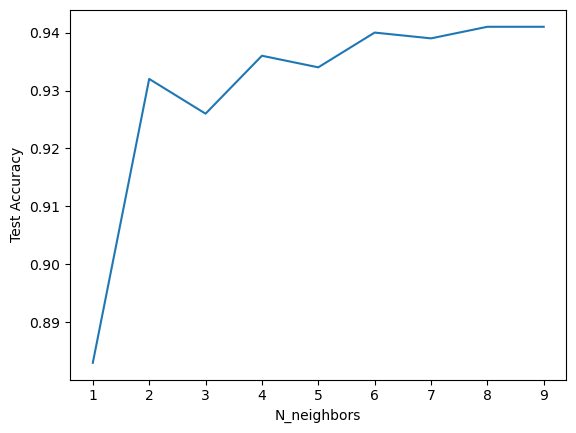

In [69]:
neighbors = [i for i in range(1,10)]
accuracy_list = run_knn(neighbors)
plt.plot(neighbors,accuracy_list)
plt.xlabel('N_neighbors')
plt.ylabel('Test Accuracy')